# EDA - Munich Solcast data
![muenchen-panorama-hp[1].jpg](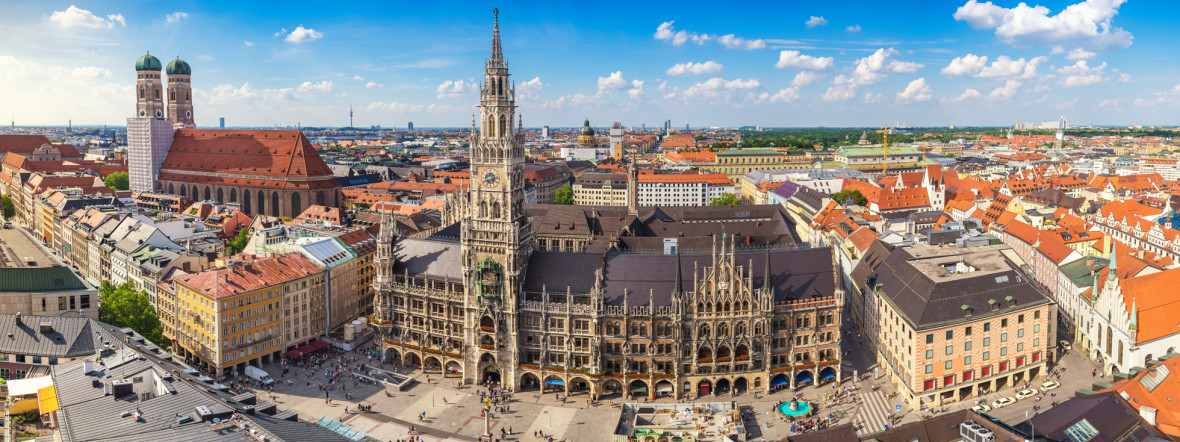)

In [ ]:
# import library
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [ ]:
# read the dataframe
data_path = os.path.join(os.getcwd(),'data/Munich_Solcast_PT60M_clean.csv')
df = pd.read_csv(data_path)
df.head()

,date,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Month
0,2018-12-31 00:00:00+01:00,1.200000,78.900000,27.666667,0.000000,27.666667,13.011111,95.322222,948.588889,263.888889,3.233333,12
1,2019-01-01 00:00:00+01:00,2.422222,64.444444,56.000000,0.000000,56.000000,7.911111,89.977778,944.066667,267.666667,5.244444,1
2,2019-01-02 00:00:00+01:00,-1.566667,65.177778,49.444444,0.000000,49.444444,5.633333,90.388889,942.788889,303.333333,7.444444,1
3,2019-01-03 00:00:00+01:00,-4.355556,50.666667,79.333333,89.666667,99.444444,4.688889,78.044444,948.933333,294.888889,4.700000,1
4,2019-01-04 00:00:00+01:00,-3.177778,74.866667,46.000000,0.000000,46.000000,7.877778,87.388889,948.488889,282.666667,3.744444,1


## General statistics

In [ ]:
# Descriptive statistics summary
df.describe()

,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Month
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,10.795031,33.908968,124.617242,238.426303,245.257381,15.563510,71.475377,948.051806,192.977730,2.746561,6.378277
std,7.288519,23.902904,55.328509,235.131736,133.032534,7.839578,12.059912,10.050360,79.875899,1.560438,3.377967
min,-7.190909,0.000000,27.666667,0.000000,27.666667,1.627273,35.030769,909.900000,22.214286,0.433333,1.000000
25%,4.906818,10.468527,79.223077,14.212121,130.525000,9.048864,62.975000,943.427121,115.310606,1.685714,3.000000
50%,10.564792,34.280000,113.918831,152.468182,220.250000,14.065625,71.498739,950.246875,219.492424,2.339583,6.000000
75%,16.614593,54.688846,165.015625,451.917411,357.308036,21.486450,80.135937,954.497273,262.377404,3.358456,9.000000
max,28.047059,83.443750,283.312500,748.545455,533.000000,39.440000,99.322222,974.088889,341.307692,10.300000,12.000000


In [ ]:
# check the missing values
df.isnull().sum()

date             0
Temperature      0
CloudOpacity     0
DHI              0
DNI              0
Radiation        0
Precipitation    0
Humidity         0
Pressure         0
WindDirection    0
WindSpeed        0
Month            0
dtype: int64

In [ ]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1068 non-null   object 
 1   Temperature    1068 non-null   float64
 2   CloudOpacity   1068 non-null   float64
 3   DHI            1068 non-null   float64
 4   DNI            1068 non-null   float64
 5   Radiation      1068 non-null   float64
 6   Precipitation  1068 non-null   float64
 7   Humidity       1068 non-null   float64
 8   Pressure       1068 non-null   float64
 9   WindDirection  1068 non-null   float64
 10  WindSpeed      1068 non-null   float64
 11  Month          1068 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 100.2+ KB


## Visualizations
### Total radiation per month

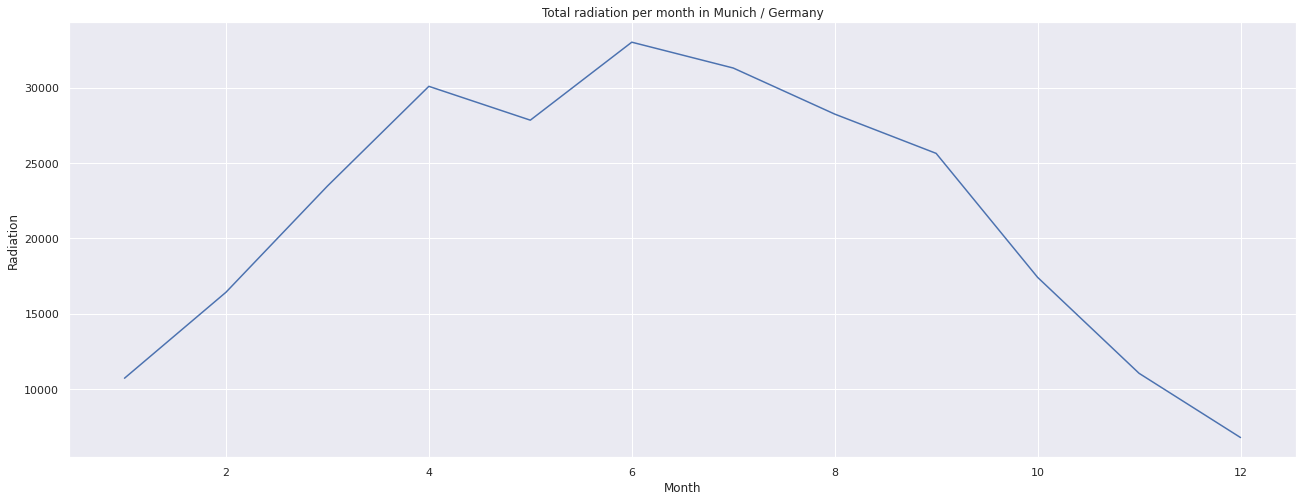

In [ ]:
df_rad_per_month = df[['Radiation', 'Month']].groupby('Month').sum()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="Month", y="Radiation", data=df_rad_per_month, ax=ax)
ax.set_title('Total radiation per month in Munich / Germany');

### Daily solar radiation

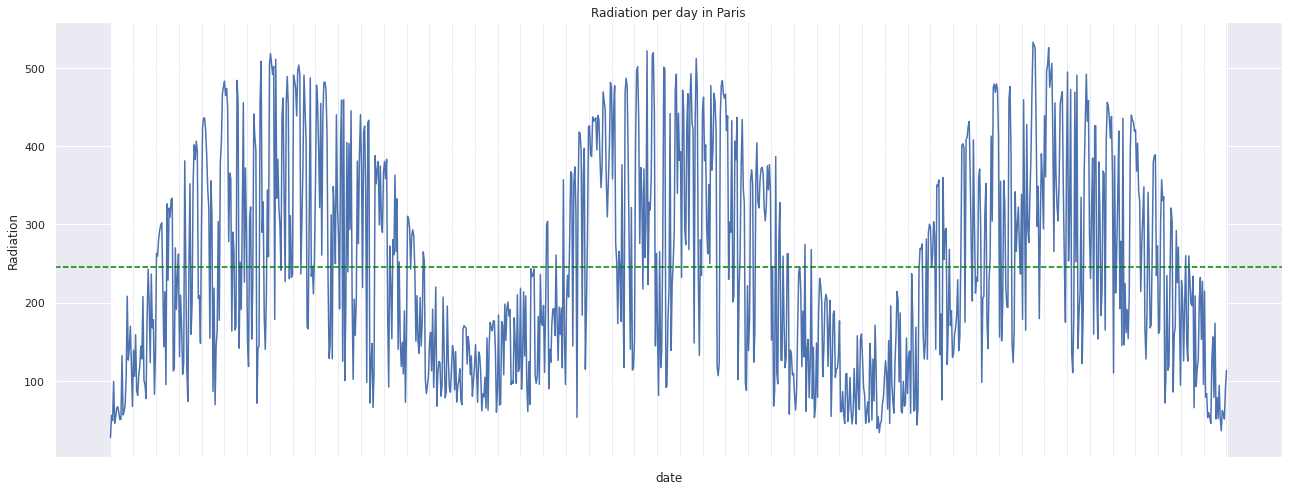

In [ ]:
rad_avg = df['Radiation'].mean()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="date", y="Radiation", data=df, ax=ax)
ax.set_title('Radiation per day in Paris');
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")
ax.set(xticklabels=[]);

### Histograms

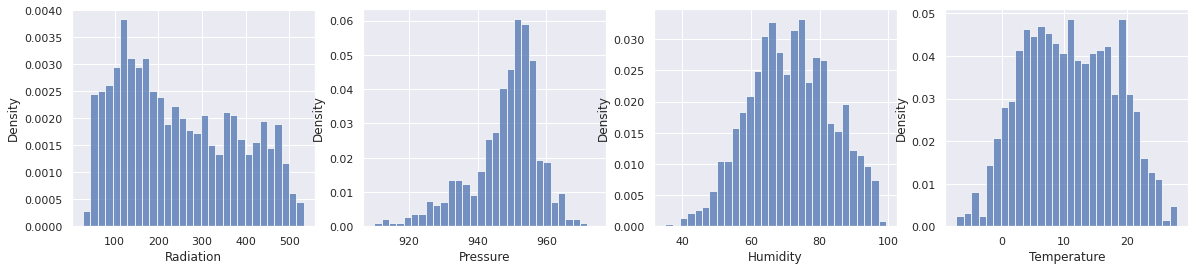

In [ ]:
plt.rcParams['font.size'] = '15'
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(df['Radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(df['Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(df['Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(df['Temperature'], stat="density", bins=30, ax=ax[3])
plt.show()

### Distribution of daily radiation by Month

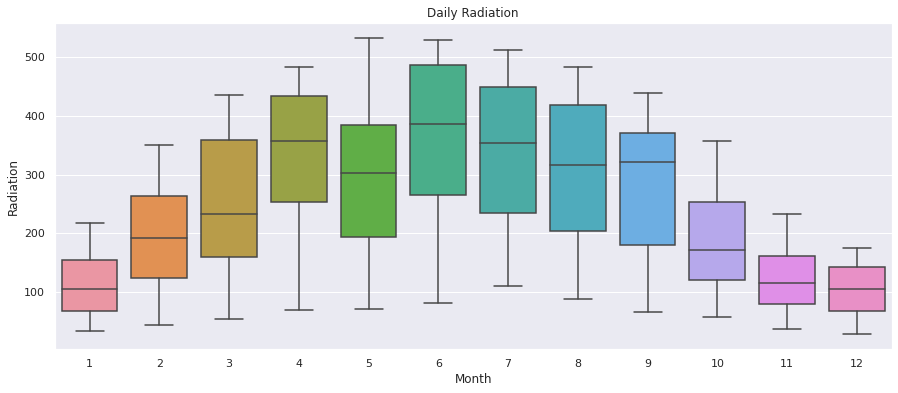

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="Month", y='Radiation', data= df)
ax.set_title('Daily Radiation')
plt.show()

### Check for Correlation between features

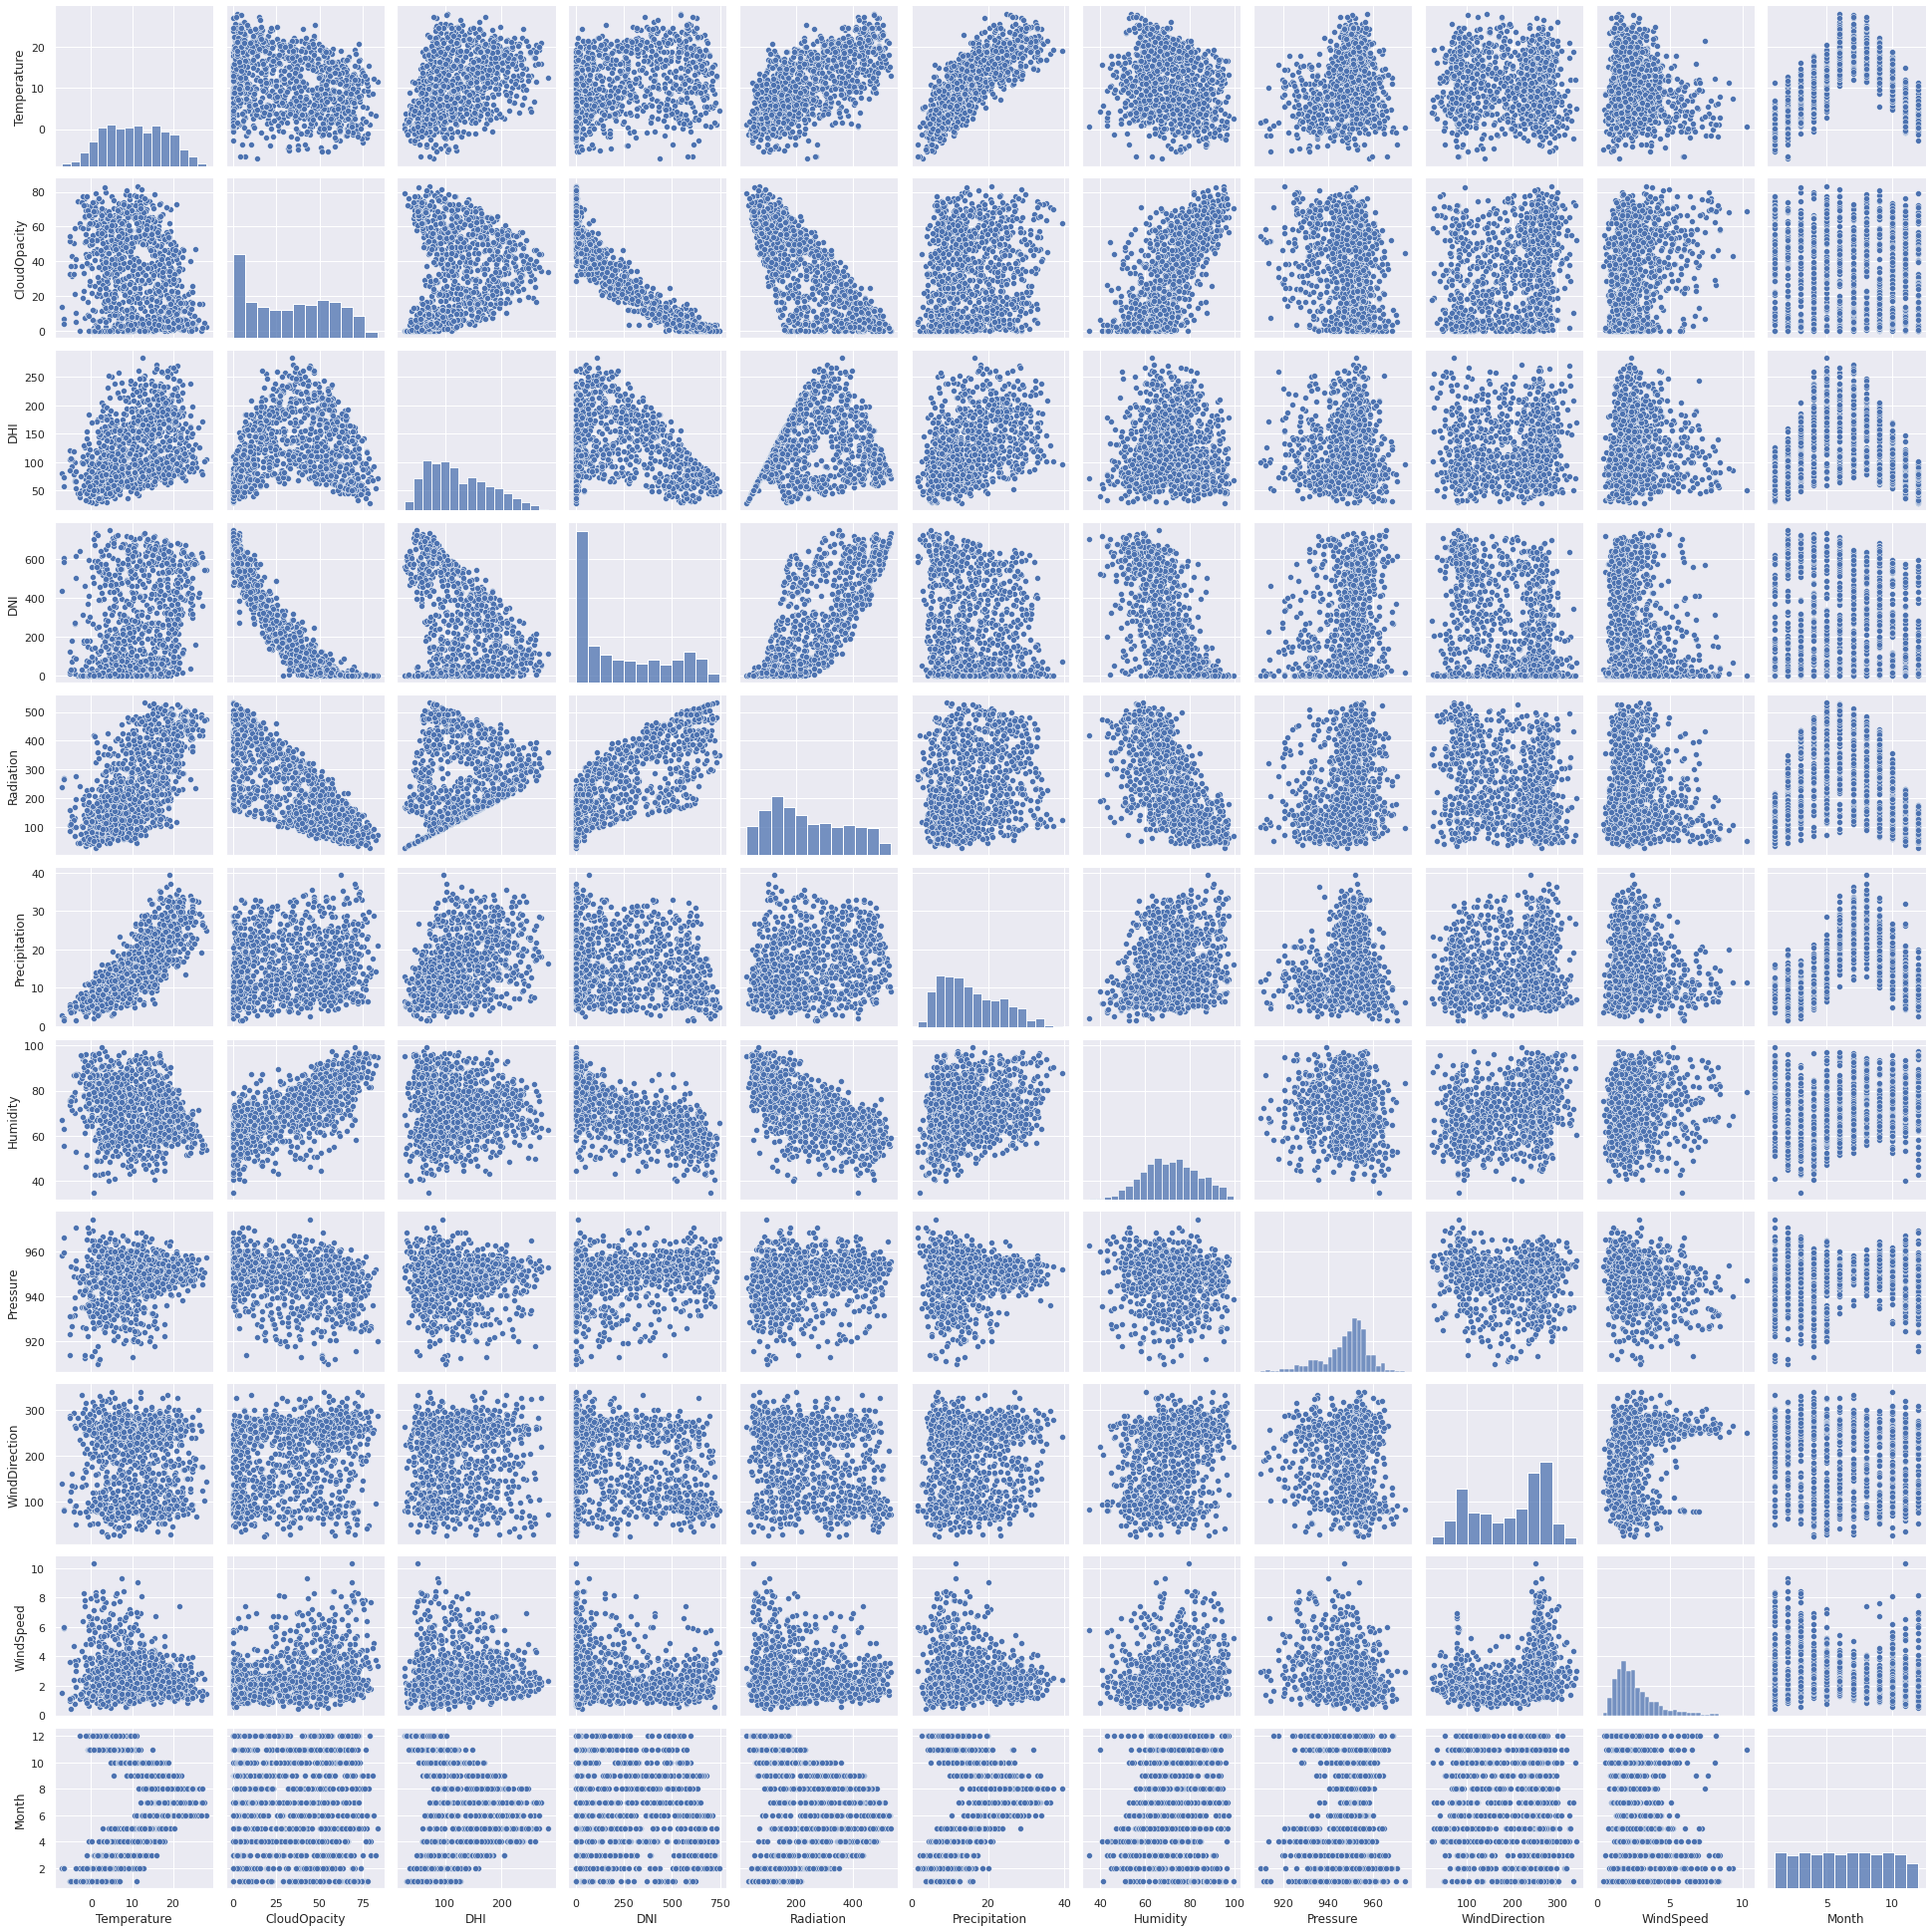

In [ ]:
sns.pairplot(df);

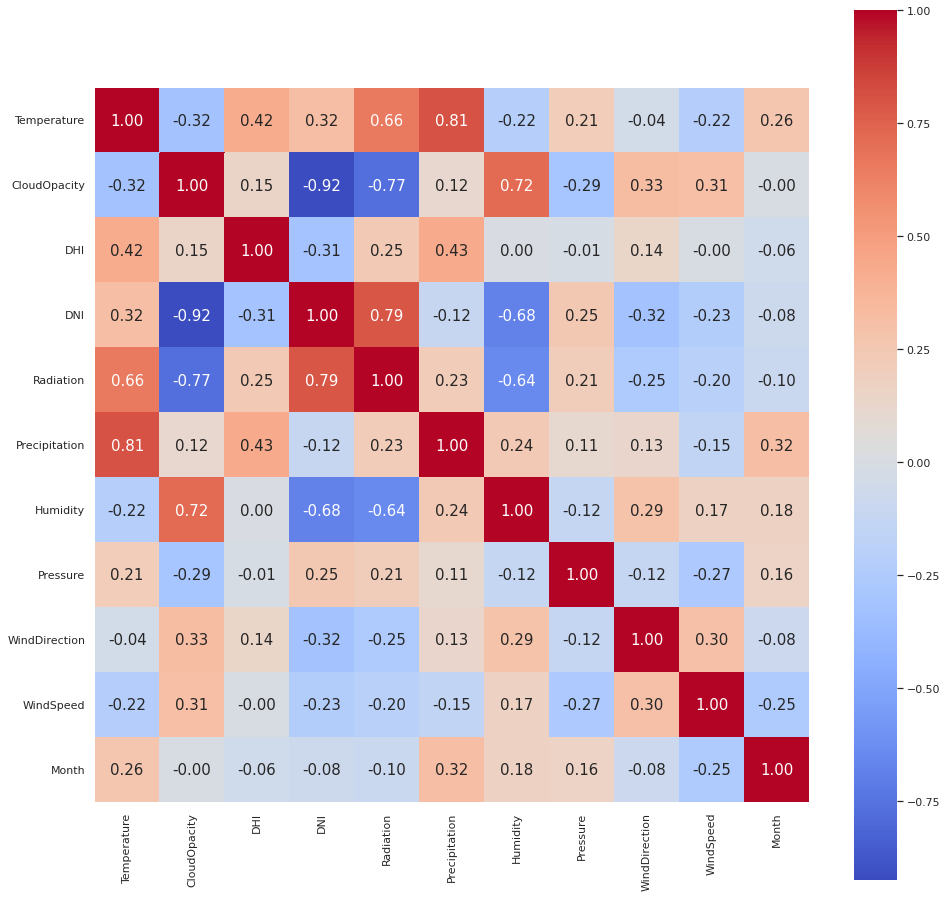

In [ ]:
corr= df.corr(method = "pearson")

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax);

### Statistical check: stationary or non-stationary (Adfuller)

In [ ]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = df['Radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # Target: p-value <= 0.05

ADF Statistic: -2.514357
p-value: 0.112020
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# convert to logarithm scale and test
Xrad = df['Radiation'].values
result = adfuller(np.log(Xrad))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # Target: p-value <= 0.05

ADF Statistic: -3.135455
p-value: 0.024038
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
